In [1]:
import pandas as pd



In [29]:
train_data1 = pd.read_excel("/Users/emanatassi/Downloads/FIT3163/data for p4 316x 2023 V2 (1)/elec_p4_dataset/Train/Actuals_part1.xlsx")

In [3]:
train_data1.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
0,2017-03-18 00:00:00,1.031472e+06,1012.48000,2.125,79.333333,16.764386,285.25,6.25375
1,2017-03-18 01:00:00,1.007206e+06,1011.61875,0.000,82.166667,15.729386,285.00,9.20500
2,2017-03-18 02:00:00,9.861084e+05,1010.72000,2.125,81.666667,15.816886,316.00,11.28375
3,2017-03-18 03:00:00,9.707610e+05,1011.37625,17.125,82.250000,15.919386,327.00,7.16875
4,2017-03-18 04:00:00,9.622584e+05,1011.50000,18.625,82.333333,15.769386,282.25,0.78000


In [30]:
train_data2 = pd.read_csv("/Users/emanatassi/Downloads/FIT3163/data for p4 316x 2023 V2 (1)/elec_p4_dataset/Train/Actuals_part2.csv")

In [5]:
train_data2.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
0,6/11/2020 0:00,1022463.932,1011.0000,36.500,71.583333,14.849386,313.125,10.43125
1,6/11/2020 1:00,1007171.432,1010.5000,30.625,73.333333,13.414386,57.875,9.56375
2,6/11/2020 2:00,994545.932,1010.0000,43.375,72.833333,12.931886,17.625,4.87750
3,6/11/2020 3:00,985150.432,1009.7375,51.500,72.666667,12.676886,24.875,4.46750
4,6/11/2020 4:00,983825.432,1009.7875,54.250,73.083333,12.319386,31.500,4.51625


In [6]:
train_data1.dtypes

Time                    datetime64[ns]
Load (kW)                      float64
Pressure_kpa                   float64
Cloud Cover (%)                float64
Humidity (%)                   float64
Temperature (C)                float64
Wind Direction (deg)           float64
Wind Speed (kmh)               float64
dtype: object

In [7]:
train_data2.dtypes

Time                     object
Load (kW)               float64
Pressure_kpa            float64
Cloud Cover (%)         float64
Humidity (%)            float64
Temperature (C)         float64
Wind Direction (deg)    float64
Wind Speed (kmh)        float64
dtype: object

In [31]:
train_data2["Time"] = pd.to_datetime(train_data2["Time"])

In [14]:
train_data2.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
0,2020-06-11 00:00:00,1022463.932,1011.0000,36.500,71.583333,14.849386,313.125,10.43125
1,2020-06-11 01:00:00,1007171.432,1010.5000,30.625,73.333333,13.414386,57.875,9.56375
2,2020-06-11 02:00:00,994545.932,1010.0000,43.375,72.833333,12.931886,17.625,4.87750
3,2020-06-11 03:00:00,985150.432,1009.7375,51.500,72.666667,12.676886,24.875,4.46750
4,2020-06-11 04:00:00,983825.432,1009.7875,54.250,73.083333,12.319386,31.500,4.51625


In [32]:
#find the intersection:
int_df = pd.merge(train_data1['Time'], train_data2['Time'], how ='inner', on =['Time'])

In [23]:
int_df.head()

,Time
0,2020-01-12 00:00:00
1,2020-01-12 01:00:00
2,2020-01-12 02:00:00
3,2020-01-12 03:00:00
4,2020-01-12 04:00:00


In [35]:
int_df.tail()

,Time
355,2020-10-12 19:00:00
356,2020-10-12 20:00:00
357,2020-10-12 21:00:00
358,2020-10-12 22:00:00
359,2020-10-12 23:00:00


In [24]:
int_df.shape

(360, 1)

In [33]:
train_data2 = pd.merge(train_data2, int_df, how = 'outer', on =['Time'], indicator=True).query('_merge=="left_only"')

In [34]:
train_data2.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),_merge
120,2020-11-11 00:00:00,1017021.432,1011.5500,67.625,72.166667,13.866886,61.500,3.38625,left_only
121,2020-11-11 01:00:00,1002644.932,1010.9375,73.625,73.416667,12.681886,32.125,3.53500,left_only
122,2020-11-11 02:00:00,987885.432,1010.5000,72.625,76.416667,12.054386,48.250,3.01375,left_only
123,2020-11-11 03:00:00,978924.932,1010.4625,62.000,78.416667,10.464386,61.875,2.32875,left_only
124,2020-11-11 04:00:00,979439.932,1011.0750,43.000,76.916667,11.321886,32.875,4.90875,left_only


In [36]:
train_data2.shape

(1344, 9)

In [43]:
train_data2.reset_index()

,index,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),_merge
0,120,2020-11-11 00:00:00,1017021.432,1011.5500,67.625,72.166667,13.866886,61.500,3.38625,left_only
1,121,2020-11-11 01:00:00,1002644.932,1010.9375,73.625,73.416667,12.681886,32.125,3.53500,left_only
2,122,2020-11-11 02:00:00,987885.432,1010.5000,72.625,76.416667,12.054386,48.250,3.01375,left_only
3,123,2020-11-11 03:00:00,978924.932,1010.4625,62.000,78.416667,10.464386,61.875,2.32875,left_only
4,124,2020-11-11 04:00:00,979439.932,1011.0750,43.000,76.916667,11.321886,32.875,4.90875,left_only
...,...,...,...,...,...,...,...,...,...,...
1339,1699,2021-01-15 19:00:00,1141078.932,1013.3875,38.375,68.333333,11.734386,306.875,6.63375,left_only
1340,1700,2021-01-15 20:00:00,1108896.432,1013.9750,28.125,73.916667,9.056886,297.625,10.08750,left_only
1341,1701,2021-01-15 21:00:00,1078978.432,1014.1875,21.125,75.833333,8.414386,334.000,8.18000,left_only
1342,1702,2021-01-15 22:00:00,1044494.932,1014.1250,17.375,74.250000,8.041886,73.625,4.12250,left_only


In [51]:
train_data2.iloc[:, :-1].head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
120,2020-11-11 00:00:00,1017021.432,1011.5500,67.625,72.166667,13.866886,61.500,3.38625
121,2020-11-11 01:00:00,1002644.932,1010.9375,73.625,73.416667,12.681886,32.125,3.53500
122,2020-11-11 02:00:00,987885.432,1010.5000,72.625,76.416667,12.054386,48.250,3.01375
123,2020-11-11 03:00:00,978924.932,1010.4625,62.000,78.416667,10.464386,61.875,2.32875
124,2020-11-11 04:00:00,979439.932,1011.0750,43.000,76.916667,11.321886,32.875,4.90875


In [52]:
train_data2 = train_data2.iloc[:, :-1]

In [53]:
final = pd.concat([train_data1, train_data2])

In [54]:
final.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
0,2017-03-18 00:00:00,1.031472e+06,1012.48000,2.125,79.333333,16.764386,285.25,6.25375
1,2017-03-18 01:00:00,1.007206e+06,1011.61875,0.000,82.166667,15.729386,285.00,9.20500
2,2017-03-18 02:00:00,9.861084e+05,1010.72000,2.125,81.666667,15.816886,316.00,11.28375
3,2017-03-18 03:00:00,9.707610e+05,1011.37625,17.125,82.250000,15.919386,327.00,7.16875
4,2017-03-18 04:00:00,9.622584e+05,1011.50000,18.625,82.333333,15.769386,282.25,0.78000


In [55]:
final.shape

(33256, 8)

### plotting

In [58]:
final.rename(columns={"Load (kW)": "load", "Pressure_kpa": "pressure", "Cloud Cover (%)": "cloud_cover", "Humidity (%)": "humidity", "Wind Direction (deg)": "wind_direction", "Wind Speed (kmh)": "wind_speed"}, inplace=True)


In [65]:
final.rename(columns={"Temperature (C)": "temp"}, inplace = True)

In [66]:
final.head()

,Time,load,pressure,cloud_cover,humidity,Temperature (C),wind_direction,wind_speed
0,2017-03-18 00:00:00,1.031472e+06,1012.48000,2.125,79.333333,16.764386,285.25,6.25375
1,2017-03-18 01:00:00,1.007206e+06,1011.61875,0.000,82.166667,15.729386,285.00,9.20500
2,2017-03-18 02:00:00,9.861084e+05,1010.72000,2.125,81.666667,15.816886,316.00,11.28375
3,2017-03-18 03:00:00,9.707610e+05,1011.37625,17.125,82.250000,15.919386,327.00,7.16875
4,2017-03-18 04:00:00,9.622584e+05,1011.50000,18.625,82.333333,15.769386,282.25,0.78000


<AxesSubplot:xlabel='Time'>

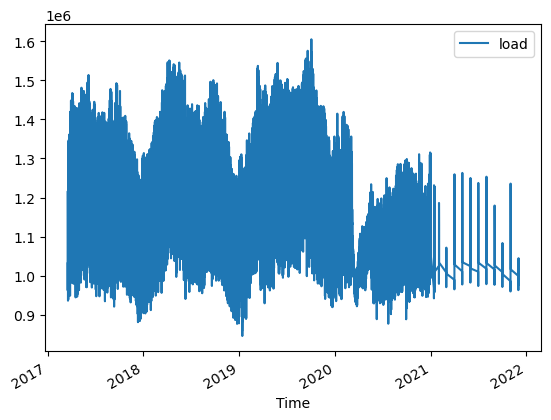

In [69]:
final.plot('Time', 'load')